VIOLENCIA DE GÉNERO EN ARGENTINA

INTRODUCCIÓN
A lo largo de los años, la situación vulnerable de la muejer en Argentna se está haciendo visible. Por lo que, exponer la cantidad de casos y sus efectos a toda la sociadas, contribuye a la visibilizacion de las mujeres que han sufrido y las que continuarán sufirendo a causa de la desgualdad de género. 
Además, permitiran avanzar pasos transcendentales en materia de políticas públicas en favor de la igualdad y contra las violencias de género. Generando acciones de corto, mediano y largo plazo sustentadas para la prevención, asistencia integral y protección de aquellas mujeres que atraviesan estas situaciones de violencia. Haciendo hincapie en aquellas.
Por lo que, es muy importante analizar que edades son la que mayor cantidad de casos hay y en que provincias. 
La informacion obtenida corresponde a aquellas comunicaciones recibdad por la Línea 144, en donde las personas que se comunican acceden a dejar sus datos para un adecuado abordaje y seguimiento. Los registros corresponden a tres sedes: Provincia de Buenos Aires, CABA y la sede de gestión nacional.
Las preguntas a responder son:
    - En que provincias se producen más casos?
    - Cuales son las edades en las que se produce más violencia?
    
OBJETIVOS
En este caso, se busca realizar un análisis estadístico y su consecuente compresión de los valores con el fin de determinar las provincias y edades más afectadas.

In [1]:
! pip install chart_studio
! pip install bqplot
! pip install pingouin

In [2]:
#PRIMER PASO: IMPORTAMOS LIBRERIAS NECESARIAS
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os



In [3]:
#SEGUNDO CASO: IMPORTAMOS LA BASE DE DATOS QUE SE ENCUENTRA EN UN ARCHIVO EXCEL
bd=pd.read_excel(r'C:\Users\garro\OneDrive\Escritorio\DATA SCIENCE\TRABAJO PRACTICO\ViolenciaGenero2.0.xlsx', sheet_name='casos')

In [4]:
#TERCER PASO: VERFICAMOS SI SE REALIZÓ LA CARGA A PARTIR DE M0STRAR LOS PRIMEROS CINCO DATOS
bd.head()

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,TIPO_VIOLENCIA_FISICA,TIPO_VIOLENCIA_PSICOLOGICA,TIPO_VIOLENCIA_SEXUAL,TIPO_VIOLENCIA_ECONOMICA,TIPO_VIOLENCIA_SIMBOLICA,TIPO_VIOLENCIA_DOMESTICA,TIPO_VIOLENCIA_INSTITUCIONAL,TIPO_VIOLENCIA_LABORAL,TIPO_VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,TIPO_VIOLENCIA_OBSTETRICA,TIPO_VIOLENCIA_MEDIATICA,TIPO_VIOLENCIA_OTRAS,VINCULO_PERSONA_AGRESORA,GENERO_AGRESOR,CASO
0,2020-01-01,Tucumán,Mujer,NaN,NaN,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,Varon,1
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,Varon,1
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1


In [5]:
#CUARTO PASO: INSPECCIONAMOS EL DATASET PARA COMPRENDER LOS DATOS QUE TENEMOS
bd.dtypes

FECHA                                          datetime64[ns]
PROVINCIA                                              object
GENERO_PERSONA_SIT_VIOLENCIA                           object
EDAD                                                  float64
PAIS_NACIMIENTO                                        object
TIPO_VIOLENCIA_FISICA                                   int64
TIPO_VIOLENCIA_PSICOLOGICA                              int64
TIPO_VIOLENCIA_SEXUAL                                   int64
TIPO_VIOLENCIA_ECONOMICA                                int64
TIPO_VIOLENCIA_SIMBOLICA                                int64
TIPO_VIOLENCIA_DOMESTICA                                int64
TIPO_VIOLENCIA_INSTITUCIONAL                            int64
TIPO_VIOLENCIA_LABORAL                                  int64
TIPO_VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA             int64
TIPO_VIOLENCIA_OBSTETRICA                               int64
TIPO_VIOLENCIA_MEDIATICA                                int64
TIPO_VIO

In [6]:
#QUINTO PASO: CAMBIAMOS EL FORMATO DE LA COLUMNA FECHA A 'DATETIME' 
bd['FECHA']=pd.to_datetime(bd.FECHA, errors='coerce')
bd.head()

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,TIPO_VIOLENCIA_FISICA,TIPO_VIOLENCIA_PSICOLOGICA,TIPO_VIOLENCIA_SEXUAL,TIPO_VIOLENCIA_ECONOMICA,TIPO_VIOLENCIA_SIMBOLICA,TIPO_VIOLENCIA_DOMESTICA,TIPO_VIOLENCIA_INSTITUCIONAL,TIPO_VIOLENCIA_LABORAL,TIPO_VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,TIPO_VIOLENCIA_OBSTETRICA,TIPO_VIOLENCIA_MEDIATICA,TIPO_VIOLENCIA_OTRAS,VINCULO_PERSONA_AGRESORA,GENERO_AGRESOR,CASO
0,2020-01-01,Tucumán,Mujer,NaN,NaN,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,Varon,1
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,Varon,1
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1


Las características relevantes que usaremos en este caso son:

1. FECHS
2. PROVINCIA
3. EDAD
4. VINCULO_PERSONA_AGRESORA: el vinculo que tiene la vinctima con la persona agresora ("pareja", ëx pareja". "padre o tutor", "madre o tutor", "otro famiiar", "superior jerárquico", "otro")


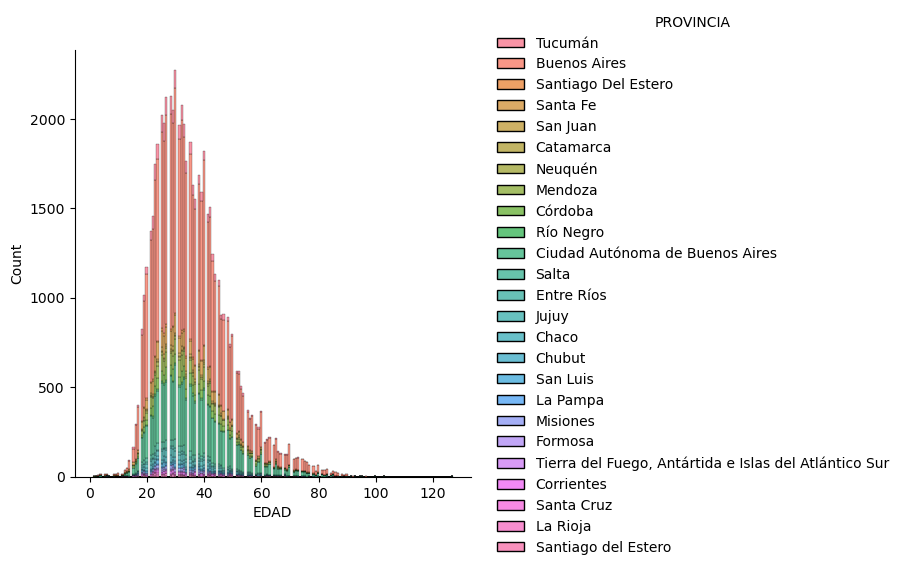

In [7]:
#SEXTO PASOñ REALIZAMOS GRAFICOS
#REALIZAMOS UN HISTOGRAMA EN EL QUE PODAMOS ANALIZAR LA DISTRIBUCIÓN DE LAS EDADES
#EN CADA PROVINCIA

sns.displot(data=bd, x="EDAD", hue="PROVINCIA", multiple="stack")

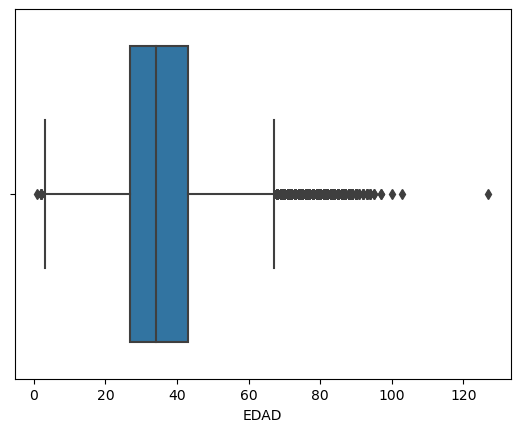

In [8]:
#PARA TENER UNA MEJOR VISUALIZACIÓN DE LOS VALORES DE LAS EDADES REALIZAMOS
#UN GRÁFICO BOXPLOT

ax=sns.boxplot(x='EDAD', data=bd)

In [9]:
estadistica_edad=bd['EDAD'].describe()
estadistica_edad

count    59232.000000
mean        35.800581
std         12.704925
min          1.000000
25%         27.000000
50%         34.000000
75%         43.000000
max        127.000000
Name: EDAD, dtype: float64

In [10]:
#PARA CONOCER EN MÁS DETALLE LA CANTIDAD DE DATOS POR PROVINCIA:
#PRIMERO CALCULAMOS LA CANTIDAD DE CASOS TOTALES POR PROVINCIA

serie_provincia=bd.PROVINCIA.value_counts()
serie_provincia

Buenos Aires                                             40490
Ciudad Autónoma de Buenos Aires                          14270
Santa Fe                                                  2965
Tucumán                                                   2585
Mendoza                                                   2570
Córdoba                                                   2010
Jujuy                                                     1031
Salta                                                     1019
Chaco                                                      611
San Juan                                                   522
San Luis                                                   521
Entre Ríos                                                 491
Neuquén                                                    474
Misiones                                                   416
Corrientes                                                 402
Río Negro                                              

Text(0.5, 0, 'Provincias')

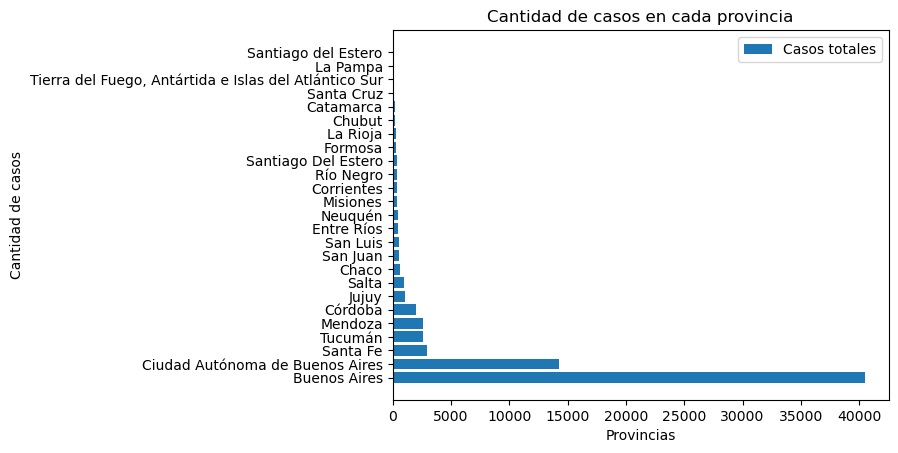

In [11]:
fig, ax= plt.subplots()
ax.barh(serie_provincia.index, serie_provincia, label='Casos totales')
ax.legend(loc='upper right')
ax.set_title('Cantidad de casos en cada provincia')
ax.set_ylabel('Cantidad de casos')
ax.set_xlabel('Provincias')

Por lo tanto, gracias a estos dos gráficos podemos realizar las primeras conclusiones:
 - la mayor cantidad de casos se da en casos con victimas de un rango de edad de entre 27-43 años, siendo la edad en la que se concentra el 50% de los casos a los 34 años
 - la provincia con mayor cantidad de casos es Buenos Aires, mientras que la de menor cantidad es La Pampa

In [22]:
#PARA MEJORAR LA VISUALIZACIÓN PODEMOS REALIZAR UNA CATEGORIZACION DE LAS PROVINCIAS EN REGIONES
# REALIZAMOS UNA COPIA DE LA COLUMNA PROVINCIA PARA PRESERVAR LOS DATOS ORIGNALES. 
bd['REGION'] = bd['PROVINCIA']

# EN LA NUEVA COLUMNA ASIGNAMOS UNA NUEVA CATEGORIA
PAMPEANA = ['Ciudad Autónoma de Buenos Aires', 'Buenos Aires', 'Córdoba', 'Entre Ríos', 'La Pampa','Santa Fe']
NOA = ['Catamarca', 'Jujuy', 'La Rioja', 'Salta', 'Santiago del Estero', 'Santiago Del Estero', 'Tucumán']
NEA = ['Corrientes', 'Chaco', 'Formosa', 'Misiones'] 
CUYO = ['Mendoza', 'San Luis', 'San Juan']
PATAGONIA = ['Chubut', 'Neuquén', 'Río Negro', 'Santa Cruz', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']

bd['REGION'] = bd['REGION'].apply(lambda x:"PAMPEANA" if x in PAMPEANA else x)
bd['REGION'] = bd['REGION'].apply(lambda x:"NOA" if x in NOA else x)
bd['REGION'] = bd['REGION'].apply(lambda x:"NEA" if x in NEA else x)
bd['REGION'] = bd['REGION'].apply(lambda x:"CUYO" if x in CUYO else x)
bd['REGION'] = bd['REGION'].apply(lambda x:"PATAGONIA" if x in PATAGONIA else x)

# CREAMOS UNA SERIE DE LAS REGIONAS CONTANDO LOS CASOS
serie_regiones=bd.REGION.value_counts()
serie_regiones

print(serie_regiones)

PAMPEANA     60295
NOA           5545
CUYO          3613
NEA           1712
PATAGONIA     1257
Name: REGION, dtype: int64


Text(0.5, 0, 'Regiones')

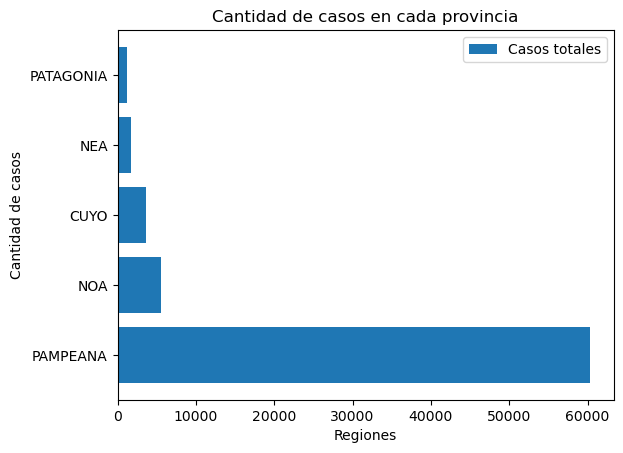

In [23]:
fig, ax= plt.subplots()
ax.barh(serie_regiones.index, serie_regiones, label='Casos totales')
ax.legend(loc='upper right')
ax.set_title('Cantidad de casos en cada provincia')
ax.set_ylabel('Cantidad de casos')
ax.set_xlabel('Regiones')

Text(0, 0.5, 'Edad')

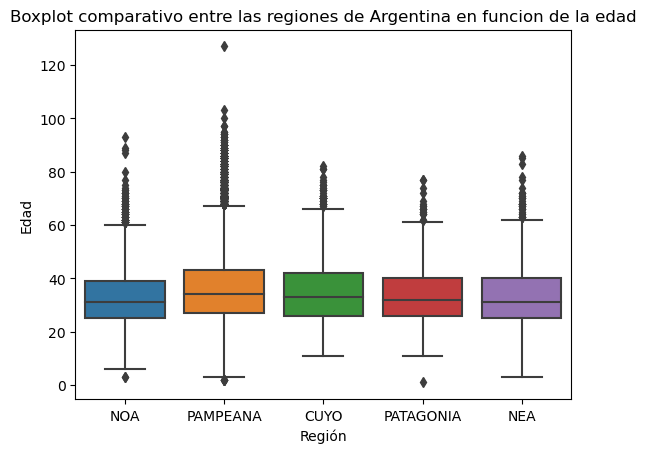

In [24]:
sns.boxplot(x=bd.REGION, y= bd.EDAD)
plt.title('Boxplot comparativo entre las regiones de Argentina en funcion de la edad')
plt.xlabel('Región')
plt.ylabel('Edad')

In [25]:
model1 = 'EDAD~REGION'
lm1   = sm.ols(formula = model1, data = bd).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   EDAD   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     84.43
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.26e-71
Time:                        06:19:29   Log-Likelihood:            -2.3247e+05
No. Observations:               58764   AIC:                         4.650e+05
Df Residuals:                   58759   BIC:                         4.650e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              35.1155    

In [26]:
#LUEGO TAMBIEN ES IMPORTANTE CONOCER CUAL ES EL VINCULO DEL AGRESOR CON LA VICTIMA
vinculo=bd.groupby('VINCULO_PERSONA_AGRESORA')
cant=bd.groupby(bd.VINCULO_PERSONA_AGRESORA)['CASO'].count()
cant 

VINCULO_PERSONA_AGRESORA
Ex pareja              34517
Madre o tutor            130
Otro                    5507
Otro familiar           2857
Padre o tutor            898
Pareja                 26590
Superior jerarquico      322
Name: CASO, dtype: int64

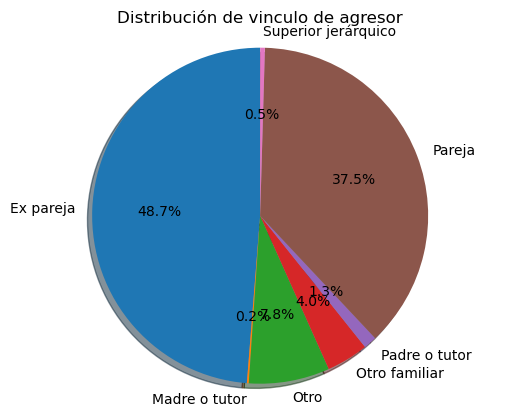

In [27]:
fig1, ax1 = plt.subplots()
#Creamos el grafico, añadiendo los valores
vinculo=['Ex pareja', 'Madre o tutor', 'Otro', 'Otro familiar', 'Padre o tutor', 'Pareja', 'Superior jerárquico']
ax1.pie(cant, labels=vinculo, autopct='%1.1f%%', shadow=True, startangle=90)
#señalamos la forma, en este caso 'equal' es para dar forma circular
ax1.axis('equal')
plt.title('Distribución de vinculo de agresor')
#plt.legend()
plt.savefig('grafica_pastel.png')
plt.show()

<Figure size 640x480 with 0 Axes>

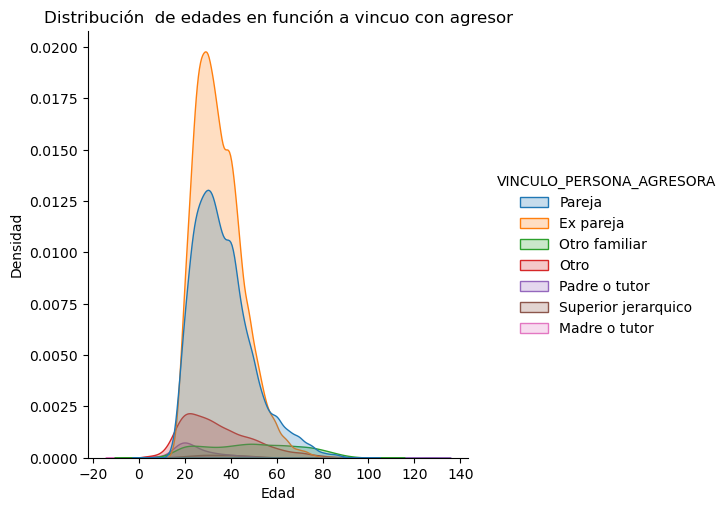

In [28]:
#PODEMOS HACER UN HISTOGRAMA QUE ANALICE EL VINCULO DEL AGRESOR EN FUNCIÓN A LA EDAD DE LA VICTIMA
#ESTO PERMITIRA CONOCER PARA CUALES SON LAS EDADES MAS VULNERABLES PARA CADA TIPO DE ÄGRESOR

plt.figure()
# Figure -level
ax = sns.displot(data=bd, x='EDAD', kind='kde', hue='VINCULO_PERSONA_AGRESORA', fill=True)
ax.set(xlabel='Edad', ylabel='Densidad', title='Distribución  de edades en función a vincuo con agresor')


Text(0, 0.5, 'Edad')

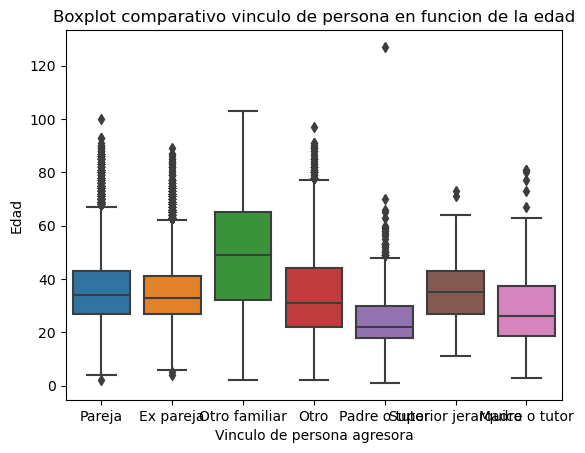

In [29]:
sns.boxplot(x=bd.VINCULO_PERSONA_AGRESORA, y= bd.EDAD)
plt.title('Boxplot comparativo vinculo de persona en funcion de la edad')
plt.xlabel('Vinculo de persona agresora')
plt.ylabel('Edad')

In [30]:
model2 = 'EDAD~VINCULO_PERSONA_AGRESORA'
lm1   = sm.ols(formula = model2, data = bd).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   EDAD   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     645.7
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        06:19:42   Log-Likelihood:            -2.2751e+05
No. Observations:               57917   AIC:                         4.550e+05
Df Residuals:                   57910   BIC:                         4.551e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [ ]:
Usamos las técnicas de regresión lineal para determinar si existía o no una relaciones entre diferentes variables
en los casos de violencia de género. 
En primer lugar, buscamos determinar la cantidad de casos por provincia y cual su varianza. Esto nos permite definir
cuales son los rangos de edad más vulnerables y en un futuro, enfatizar las acciones legislativas y de asistencia a 
esas edades. En este caso, observamos que el 50% de los casos se acumulaban entre los 27 (25%) a 43 (75%) años, siendo
el 50% los 34 años.
En segundo lugar, realizamos un grfico de barras que indicaba la cantidad de casos por provincia. Esto permite darnos 
una idea de cuales son las provincias más vulerables y, por lo tanto, crear una mayor cantidad de centros de asistencia
a la mujer. En este caso, observamos que la provincia con mayor cantidad de casos es Buenos Aires, mientras que la de 
menor cantidad es La Pampa. 
Luego, para facilitar la visualización de los datos realizamos una categorización de las provincias en regiones (Pampeana,
NOA, NEA, Cuyo y Patagonia).Además, buscamos identificar la media de las edades de las victimas nn cada región. 
En tercer lugar, determinamos la cantidad de casos en función al vincula del agresor con la víctima y, cuales son las edades
más afectadas en cada tipo de vínculo. Observamos que las victimas cuyo agresor es un familiar (madre, padre, tutor u ptro
familiar) son entre los 11 a 20 años. Mientras que, aquellas en las que el agresor es la pareja o ex pareja son de entre 18 
a 45 años. 
                                                                                                            

